top 10 worst directors:
(1, 'Jared Hess', -0.33226441981738392)
(2, 'Troy Duffy', -0.29197518476196638)
(3, 'Uli Edel', -0.23519517691309211)
(4, 'Rob Bowman', -0.1647192930420554)
(5, 'Olivier Megaton', -0.1619007160930731)
(6, 'Spike Jonze', -0.16079649910501287)
(7, 'Boaz Yakin', -0.15907955556559683)
(8, 'Vadim Perelman', -0.15544773230057488)
(9, 'Brian Koppelman', -0.15466282257508324)
(10, 'Robert Harmon', -0.1437424361944443)

top 10 directors:
(1, 'Christopher McQuarrie', 0.3380586228829372)
(2, 'Martin Ritt', 0.3160391969143152)
(3, 'Steven Soderbergh', 0.27183538090342496)
(4, 'Preston A. Whitmore II', 0.26955917898411519)
(5, 'Wolfgang Petersen', 0.25087829265962408)
(6, 'Peter Hyams', 0.24854508979421044)
(7, 'Werner Herzog', 0.21079113877940253)
(8, 'David Dobkin', 0.203519735149993)
(9, 'Florian Henckel von Donnersmarck', 0.18656805747035682)
(10, 'Robert Wise', 0.18487987630685143)

duration affect:


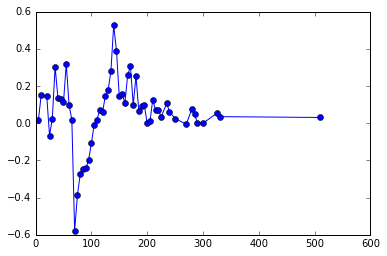


budget affect:


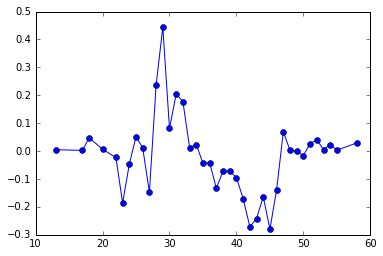


year affect:


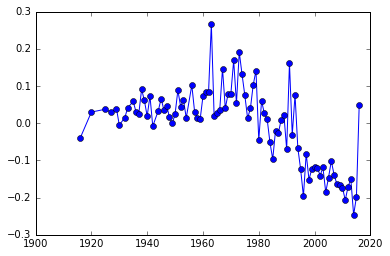

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
from collections import Counter
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
import matplotlib.pyplot as plt

mm = pd.read_csv('movie_metadata.csv')

mmis = mm.loc[:,["duration","budget","title_year","director_name","imdb_score"]]

c = Counter(mmis["director_name"])
def other(x):
    #one movie directors will be rename "Other"
    if c[x] > 1:
        return x
    return "Other"
    
def func(fun,x):
    #will not applay fun on nan
    if np.isnan(x):
        return x
    return fun(x)

#discretize the input and revers logistic function the imdb score     
mmis["director_name"] = mmis["director_name"].apply(other).astype("category")
mmis["duration"] = mmis["duration"].apply(lambda y: func(lambda x: int(x/5)*5,y)).astype("category")
mmis["imdb_score"] = mmis["imdb_score"].apply(lambda y: func(lambda x: -np.log(10/x -1),y))
mmis["title_year"] = mmis["title_year"].apply(lambda y: func(lambda x: int(x),y)).astype("category")
mmis["budget"] = mmis["budget"].apply(lambda y: func(lambda x: int(2.5*np.log(x)),y)).astype("category")

ll = [1,
    len(mmis["duration"].cat.categories),
    len(mmis["budget"].cat.categories),
    len(mmis["title_year"].cat.categories),
    len(mmis["director_name"].cat.categories)
    ]#size of each category group
    
cs = np.cumsum(ll) #position of category group
    
cl = [
    (mmis["duration"].cat.categories),
    (mmis["budget"].cat.categories),
    (mmis["title_year"].cat.categories),
    (mmis["director_name"].cat.categories)
    ] #name of categorys 

#use one hot encoder for the imput
mmis = pd.get_dummies(mmis, prefix = ["duration","budget","title_year","director_name"])

#clear nan values form the imdb score
mmis = mmis.dropna() 

Y = mmis["imdb_score"].values #target
X = mmis.iloc[:,1:].values #imput



#optimizing parameters
#kf = KFold(n_splits=2, shuffle= True)
#
#for i in range(3,7): #for i in range(1,20):
#    e,r = 0,0
#    for j in range(100): #10
#        for train_index, test_index in kf.split(X):
#            lr = PLSRegression(n_components=i, scale=False)
#            lr.fit(X[train_index],Y[train_index])
#            e += lr.score(X[test_index],Y[test_index])
#            r += lr.score(X[train_index],Y[train_index])
#    print ((i, e/200, r/200))
    
lr = PLSRegression(n_components=5, scale=False)
lr.fit(X,Y)

#results:

name = cl[3][lr.coef_[:,0][cs[3]:cs[4]].argsort()]
score = lr.coef_[:,0][cs[3]:cs[4]][lr.coef_[:,0][cs[3]:cs[4]].argsort()]


print("top 10 worst directors:")
for i in range (10):
    print((i+1, name[i], score[i]))
 
print("")   
print("top 10 directors:")
for i in range (1,11):
    print((i, name[-i], score[-i]))

print("")   
print("duration affect:")
plt.plot(cl[0],lr.coef_[:,0][cs[0]:cs[1]],"bo-")
plt.show()



print("")   
print("budget affect:")
plt.plot(cl[1],lr.coef_[:,0][cs[1]:cs[2]],"bo-")
plt.show()

print("")   
print("year affect:")
plt.plot(cl[2],lr.coef_[:,0][cs[2]:cs[3]],"bo-")
plt.show()